Importing

In [121]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel

In [2]:
import pandas as pd

import itertools

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import matplotlib.gridspec as gridspec

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison

import seaborn as sns

from tqdm.notebook import tqdm_notebook as tqdm

Functions

In [3]:
def accuracy(y_true, y_predicted):
  length = len(y_true)
  error = 0
  for i in range(length):
    if (y_true[i] != y_predicted[i]):
      error+=1
  accuracy = (length - error)/length
  return accuracy

In [123]:
def Apply_my_SVM(X,y,learning_rate, lambda_param, n_iters):
  #Pre-processing for data
  y = y.T[0]
  y_copy = np.copy(y)
  y = np.array(pd.get_dummies(y).to_numpy().tolist())
  
  #Applying SVM
  svm = SVM(learning_rate, lambda_param, n_iters)

  svm.fit(X,y)
  y_predicted = svm.predict(X)

  svm.visualize(X,y_copy)

Concept

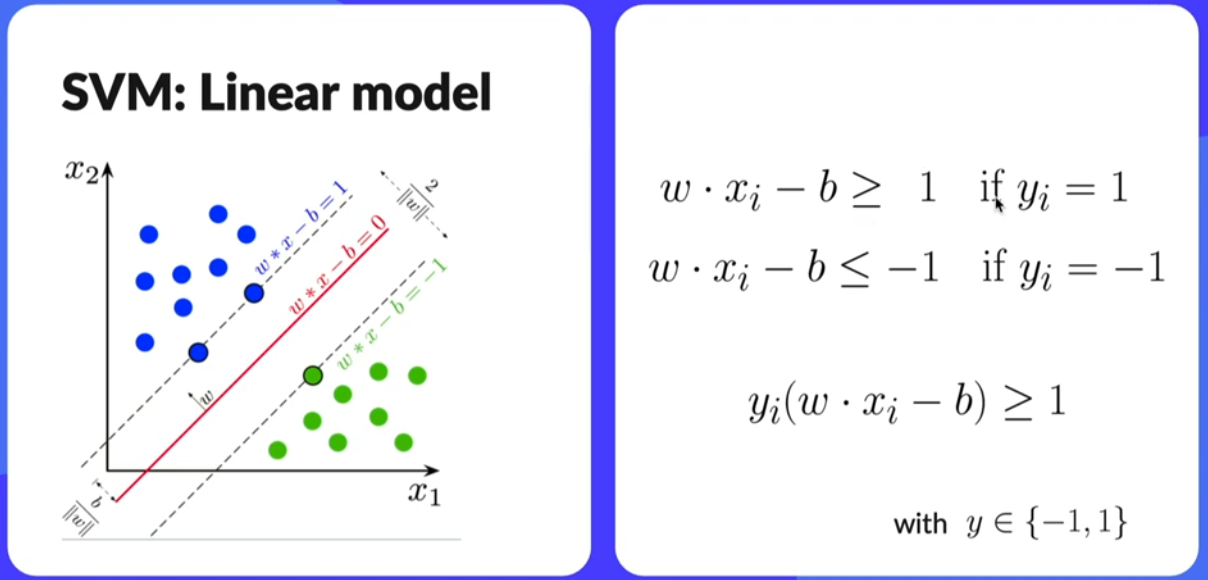

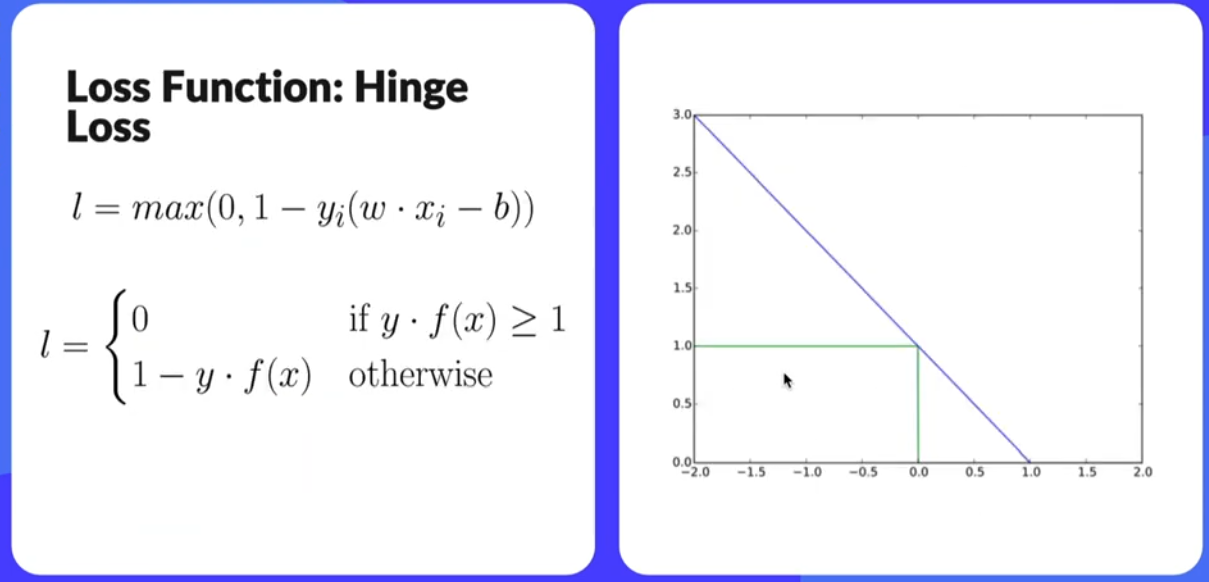

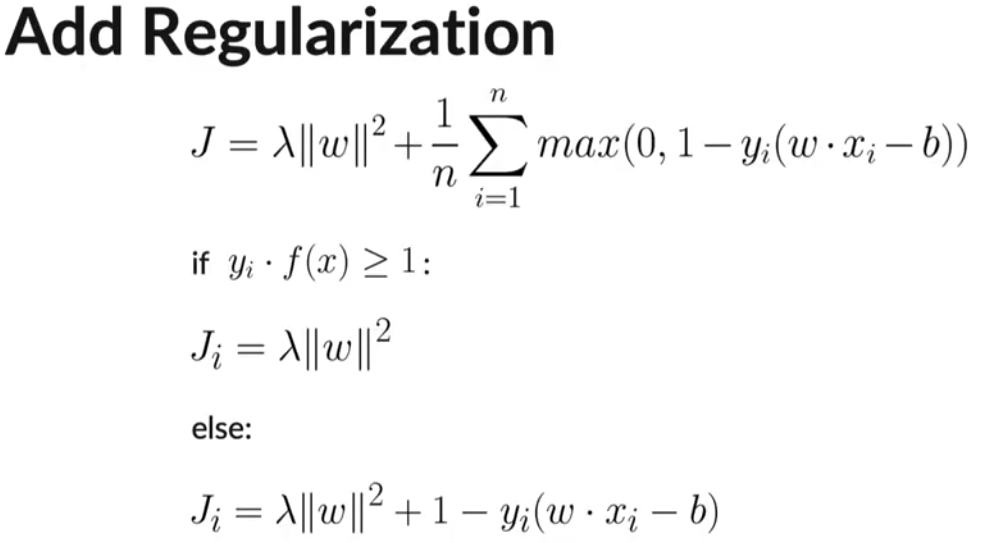

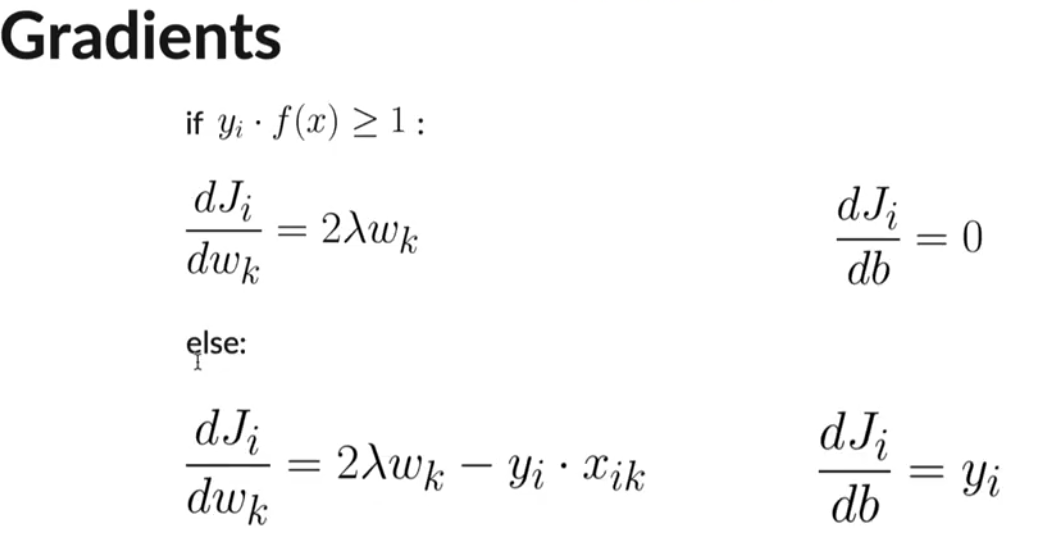

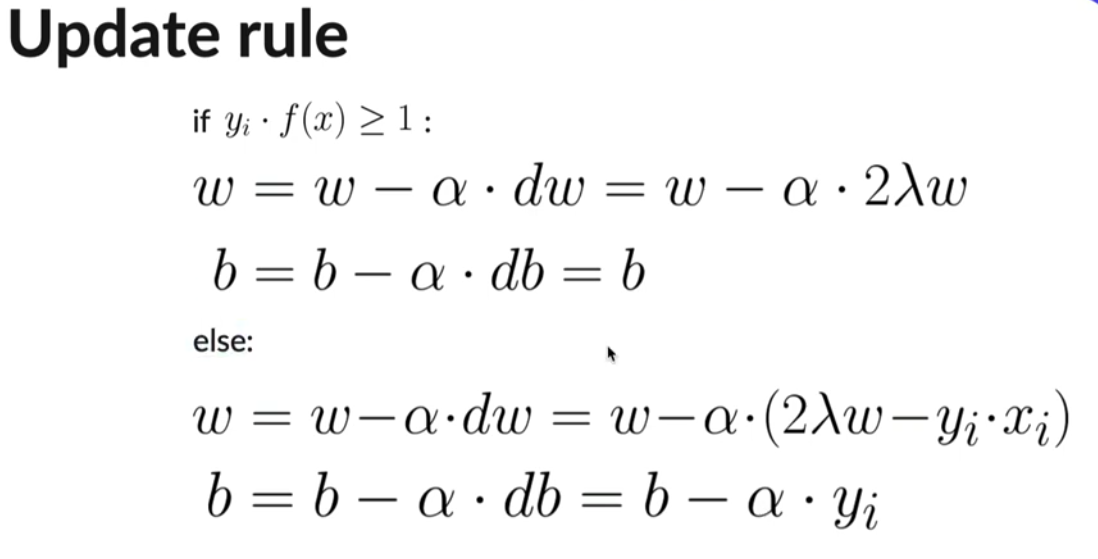

Implementation of SVM

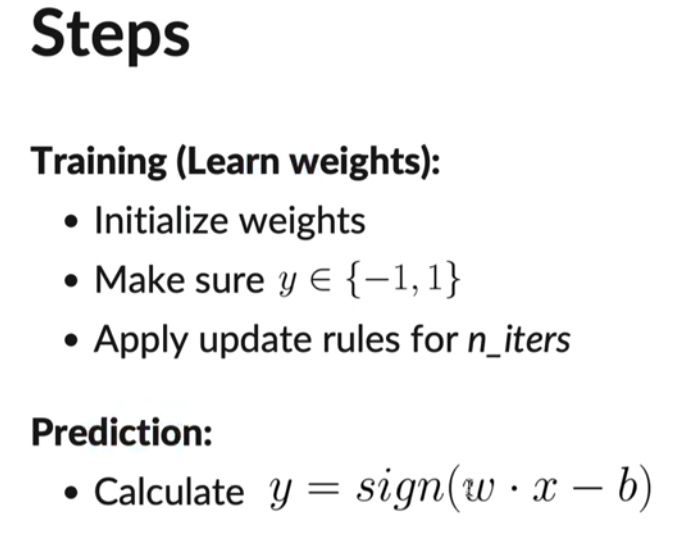

In [124]:
class SVM:
  #initialization
  def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=10):
    self.lr = learning_rate
    self.lambda_param = lambda_param
    self.n_iters = n_iters
    self.w = []
    self.b = []
    self.accuracy = 0

  #Training
  def fit(self, X, y):
    n_samples, n_features = X.shape
    rows, columns = y.shape   
    #init weights
    self.w = np.zeros([columns,n_features])
    self.b = np.zeros(columns)
    for _ in range(self.n_iters):
      for i in range(columns):
        y_ = np.where(y[:,i] == 0, -1, 1)
        for idx, x_i in enumerate(X):
            condition = y_[idx] * (np.dot(x_i, self.w[i]) - self.b[i]) >= 1
            if condition:
              self.w[i] -= self.lr * (2 * self.lambda_param * self.w[i])
            else:
              self.w[i] -= self.lr * (2 * self.lambda_param * self.w[i] - np.dot(x_i, y_[idx]))
              self.b[i] -= self.lr * y_[idx]

  #Testing
  def predict(self, X):
    columns = len(self.w)
    y_predicted = []
    for i in range(columns):
      approx = np.dot(X, self.w[i]) - self.b[i]
      y_predicted_temp = np.sign(approx)
      y_predicted.append(y_predicted_temp)
    y_predicted = np.array(y_predicted).T
    return y_predicted

  #Visualization
  def visualize(self,X,y):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    #plotting given data
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)
    #Creating test data to get the magins
    x0_min = np.amin(X[:, 0])
    x0_max = np.amax(X[:, 0])
    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    minn = min(x0_min, x1_min)
    maxx = max(x0_max, x1_max)
    rangee = np.arange(minn,maxx,1).tolist()
    X_test = []
    for i in range(len(rangee)):
      for j in range(len(rangee)):
        temp = []
        temp.append(rangee[i])
        temp.append(rangee[j])
        X_test.append(temp)
    X_test = np.array(X_test)
    #getting predictions of the test data made
    yyy = self.predict(X_test)
    yy = np.copy(yyy)
    yy = np.array(yy)
    rows, columns = yy.shape
    for i in range(columns):
      yy[:,i] = np.where(yy[:,i] < 0, 0, 1)
    yy = np.array(yy)
    yyy = [np.where(r==1)[0][0] for r in yy]
    yyy = np.array(yyy)
    #plotting the margins
    plt.scatter(X_test[:, 0], X_test[:, 1], marker=".", c=yyy)
    plt.show()

Applying on needed files

**Reading data**

In [8]:
file_Aggregation = "Aggregation.txt"
data_Aggregation = np.loadtxt(file_Aggregation, skiprows=7)

file_Compound = "Compound.txt"
data_Compound = np.loadtxt(file_Compound, skiprows=7)

file_D31 = "D31.txt"
data_D31 = np.loadtxt(file_D31, skiprows=7)

file_Flame = "Flame.txt"
data_Flame = np.loadtxt(file_Flame, skiprows=7)

file_Jain = "Jain.txt"
data_Jain = np.loadtxt(file_Jain, skiprows=7)

file_Pathbased = "Pathbased.txt"
data_Pathbased = np.loadtxt(file_Pathbased, skiprows=7)

file_R15 = "R15.txt"
data_R15 = np.loadtxt(file_R15, skiprows=7)

file_Spiral = "Spiral.txt"
data_Spiral = np.loadtxt(file_Spiral, skiprows=7)

**Splitting data to x and y**

In [9]:
data_Aggregation_x = data_Aggregation[:,0:-1]
data_Aggregation_y = data_Aggregation[:,-1:]
#shuffling
data_Aggregation_x, data_Aggregation_y = shuffle_arrays_unison(arrays=[data_Aggregation_x, data_Aggregation_y], random_seed=42)

data_Compound_x = data_Compound[:,0:-1]
data_Compound_y = data_Compound[:,-1:]
#shuffling
data_Compound_x, data_Compound_y = shuffle_arrays_unison(arrays=[data_Compound_x, data_Compound_y], random_seed=42)

data_D31_x = data_D31[:,0:-1]
data_D31_y = data_D31[:,-1:]
#shuffling
data_D31_x, data_D31_y = shuffle_arrays_unison(arrays=[data_D31_x, data_D31_y], random_seed=42)

data_Flame_x = data_Flame[:,0:-1]
data_Flame_y = data_Flame[:,-1:]
#shuffling
data_Flame_x, data_Flame_y = shuffle_arrays_unison(arrays=[data_Flame_x, data_Flame_y], random_seed=42)

data_Jain_x = data_Jain[:,0:-1]
data_Jain_y = data_Jain[:,-1:]
#shuffling
data_Jain_x, data_Jain_y = shuffle_arrays_unison(arrays=[data_Jain_x, data_Jain_y], random_seed=42)

data_Pathbased_x = data_Pathbased[:,0:-1]
data_Pathbased_y = data_Pathbased[:,-1:]
#shuffling
data_Pathbased_x, data_Pathbased_y = shuffle_arrays_unison(arrays=[data_Pathbased_x, data_Pathbased_y], random_seed=42)

data_R15_x = data_R15[:,0:-1]
data_R15_y = data_R15[:,-1:]
#shuffling
data_R15_x, data_R15_y = shuffle_arrays_unison(arrays=[data_R15_x, data_R15_y], random_seed=42)

data_Spiral_x = data_Spiral[:,0:-1]
data_Spiral_y = data_Spiral[:,-1:]
#shuffling
data_Spiral_x, data_Spiral_y = shuffle_arrays_unison(arrays=[data_Spiral_x, data_Spiral_y], random_seed=42)

Applying SVM [Using best parameters from the SVM lab assignment]

Aggregation

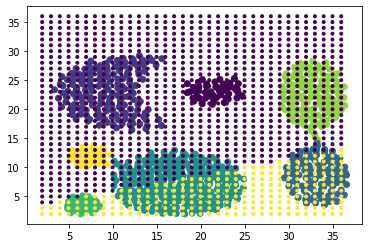

In [106]:
Apply_my_SVM(data_Aggregation_x, data_Aggregation_y,0.01, 2.3, 100)

Compound

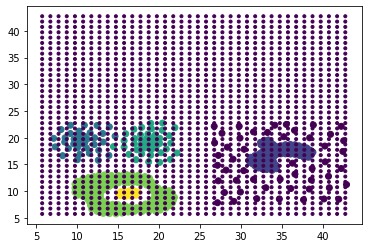

In [113]:
Apply_my_SVM(data_Compound_x, data_Compound_y,1, 1, 1000)

D31

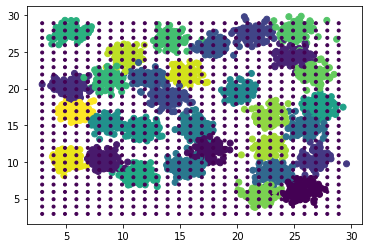

In [122]:
Apply_my_SVM(data_D31_x, data_D31_y,1, 1, 1000)

Flame

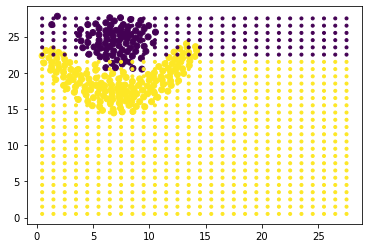

In [102]:
Apply_my_SVM(data_Flame_x, data_Flame_y,0.001, 1.5, 1000)

Jain

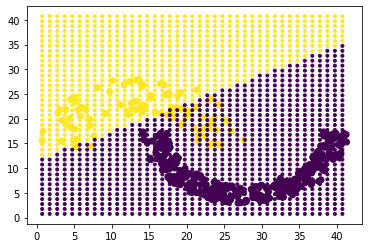

In [103]:
Apply_my_SVM(data_Jain_x, data_Jain_y,0.001, 1, 1000)

Pathbased

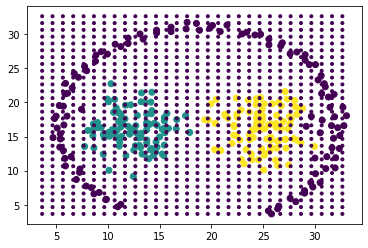

In [116]:
Apply_my_SVM(data_Pathbased_x, data_Pathbased_y,1, 1, 1000)

R15

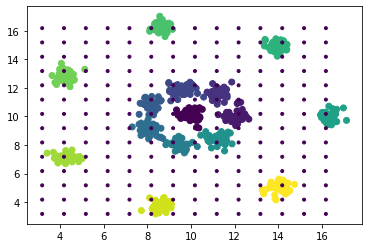

In [119]:
Apply_my_SVM(data_R15_x, data_R15_y,1, 0.1, 1000)

Spiral

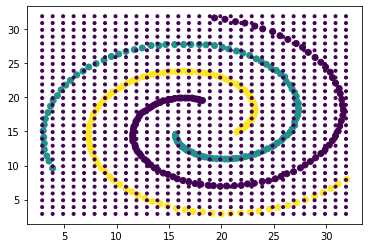

In [118]:
Apply_my_SVM(data_Spiral_x, data_Spiral_y,1, 0.2, 1000)

Refrence:

-> https://www.youtube.com/watch?v=T9UcK-TxQGw&list=RDCMUCtatfZMf-8EkIwASXM4ts0A&index=4